# Tutorial para hacer diferentes gráficas en Python

![Banner del evento](https://docs.google.com/uc?export=download&id=1XGnCou5ZiOMky2UcgszAx6MMVsL6hUoU)

# Importacion y carga de Datos

## Importacion de librerias
En esta sección importaremos las dependencias básicas de nuestro notebook.

In [0]:
%matplotlib inline
import plotly
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## Descarga del Dataset
Descargamos el dataset de salud y procedemos a cargarlo utilizando pandas para su respectivo análisis.

**Nota importante:** El análisis que realizamos acá es de caracter ilustrativo y no implica que vayan a realizar el mismo procedimiento

In [2]:
!wget https://www.dropbox.com/s/m6gsux8h9be2afd/Sivigila_enfermedades_2015_2019_parseo_fechas.xlsx?dl=1 -O Sivigila_enfermedades_2015_2019.xlsx
df=pd.read_excel('Sivigila_enfermedades_2015_2019.xlsx')
df.T

--2019-09-25 15:46:27--  https://www.dropbox.com/s/m6gsux8h9be2afd/Sivigila_enfermedades_2015_2019_parseo_fechas.xlsx?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/m6gsux8h9be2afd/Sivigila_enfermedades_2015_2019_parseo_fechas.xlsx [following]
--2019-09-25 15:46:27--  https://www.dropbox.com/s/dl/m6gsux8h9be2afd/Sivigila_enfermedades_2015_2019_parseo_fechas.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9add90d06e39b29b010ef5c26a.dl.dropboxusercontent.com/cd/0/get/ApOWccX26wVGt-gZIuCUX3pSPGqIMVQclsZz89oJpdGFnK88mPbdC2j7KpSlwD88ZrwjmS8yWktICOnkHv0aDpMKL198v2Xr4DU_URhyMFVSzVdEH0pvGL0Zd6kCby-Yksg/file?dl=1# [following]
--2019-09-25 15:46:28--  https://uc9add90d06e39b29b010ef5c26a.dl.dropboxusercontent.com/cd/0/ge

0      ...                                   14237
cod_eve                                             210  ...                                     210
grupo            ENFERMEDADES TRANSMITIDAS POR VECTORES  ...  ENFERMEDADES TRANSMITIDAS POR VECTORES
fec_not                             2015-01-04 00:00:00  ...                     2019-03-04 00:00:00
semana                                                1  ...                                       9
año                                                2015  ...                                    2019
cod_pre                                      6800100431  ...                              6854704947
cod_sub                                               1  ...                                       1
repet                                                 0  ...                                       0
grupo etario                                    10 a 14  ...                                 50 a 59
grupo edad                                      7  a 11  ...                                 29 a 59
Ciclo de vida                                  Infancia  ...                                 Adultez
sexo_                                                 M  ...                                       F
cod_pais_o                                          170  ...                                     170
cod_dpto_o                                           68  ...                                      68
cod_mun_o                                             1  ...                                       1
codigomunicipio                                   68001  ...                                   68001
area_                                                 1  ...                                       1
localidad_                                       URBANA  ...                                     NaN
cen_pobla_                                          NaN  ...                                     NaN
vereda_                                             NaN  ...                                     NaN
bar_ver_                              LAGOS DEL CACIQUE  ...                 9999999 SIN INFORMACION
Comuna                             16 LAGOS DEL CACIQUE  ...                        SIN INFORMACIÓN 
ocupacion_                                         9997  ...                                    5249
tip_ss_                                               C  ...                                       E
cod_ase_                                         EPS130  ...                                  EMP019
aseguradora                              EPS COLSANITAS  ...        COLPATRIA S.A MEDICINA PREPAGADA
per_etn_                                              6  ...                                       6
gp_discapa                                            2  ...                                       2
gp_desplaz                                            2  ...                                       2
gp_migrant                                            2  ...                                       2
...                                                 ...  ...                                     ...
gp_indigen                                            2  ...                                       2
gp_pobicbf                                            2  ...                                       2
gp_mad_com                                            2  ...                                       2
gp_desmovi                                            2  ...                                       2
gp_psiquia                                            2  ...                                       2
gp_vic_vio                                            2  ...                                       2
gp_otros                                              1  ...                                       1
cod_dpto_r                                           68  ...                                      68
cod_mun_r 

# SELECCIONAR COLUMNAS

In [0]:
df_=df[["fec_not","semana","año","grupo edad","sexo_","area_","localidad_","cen_pobla_","vereda_","bar_ver_","Comuna","ocupacion_","tip_ss_","fec_con_","ini_sin_","pac_hos_","tip_cas_","fec_hos_","con_fin_","fec_def_","ajuste_","cbmte_","nom_eve","nom_upgd","ndep_proce"]]
df_.T

0      ...                    14237
fec_not                      2015-01-04 00:00:00  ...      2019-03-04 00:00:00
semana                                         1  ...                        9
año                                         2015  ...                     2019
grupo edad                               7  a 11  ...                  29 a 59
sexo_                                          M  ...                        F
area_                                          1  ...                        1
localidad_                                URBANA  ...                      NaN
cen_pobla_                                   NaN  ...                      NaN
vereda_                                      NaN  ...                      NaN
bar_ver_                       LAGOS DEL CACIQUE  ...  9999999 SIN INFORMACION
Comuna                      16 LAGOS DEL CACIQUE  ...         SIN INFORMACIÓN 
ocupacion_                                  9997  ...                     5249
tip_ss_                                        C  ...                        E
fec_con_                     2015-01-04 00:00:00  ...      2019-03-02 00:00:00
ini_sin_                     2015-01-04 00:00:00  ...      2019-02-28 00:00:00
pac_hos_                                       1  ...                        2
tip_cas_                                       2  ...                        2
fec_hos_                     2015-01-04 00:00:00  ...                    -   -
con_fin_                                       1  ...                        1
fec_def_                                   -   -  ...                    -   -
ajuste_                                        3  ...                        6
cbmte_                                       NaN  ...                      NaN
nom_eve                                   DENGUE  ...                   DENGUE
nom_upgd    CLINICA MATERNO INFANTIL SAN LUIS SA  ...        RETROALIMENTACIÓN
ndep_proce                             SANTANDER  ...                SANTANDER

[25 rows x 14238 columns]

# DIAGRAMA DE BARRAS

Gráfico usado para representar un conjunto de datos de variables cualitativas o discretas. Se caracteriza por las barras rectangulares que contiene, cuya altura es proporcional a la frecuencia de cada uno de los valores de la variable. 

Las barras pueden ser horizontales o verticales, aunque es más común encontrarlas de forma vertical. 

**EJEMPLO:** 

En la siguiente gráfica se encuentra la información de la columna denominada "Comuna", en el *eje x* se observan las diferentes comunas que hay mientras que en el *eje y* se encuentra la freucencia de cada una. Con esta gráfica se puede inferir que en el "Norte" es donde más se presentan casos. 

In [0]:
#datos
idx = df_['Comuna'].value_counts().index.tolist()
valores=df_['Comuna'].value_counts() 
print(idx)

#estableccer la figura como diagrama de barras y pasarle los datos
fig = go.Figure(data=go.Bar(x=idx, y=valores))
# Establecer el título
fig.update_layout(title_text="Incidencia por comuna")
# Establecer el ancho del borde de cada barra
fig.data[0].marker.line.width = 4
# Establecer el color del borde de cada barra
fig.data[0].marker.line.color = "black"
fig.show()

['1 NORTE', 'SIN INFORMACIÓN ', '3 SAN FRANCISCO', '13 ORIENTAL', '5 GARCIA ROVIRA', '10 PROVENZA', '4 OCCIDENTAL', '11 SUR', '12 CABECERA DEL LLANO', '6 LA CONCORDIA', '7 LA CIUDADELA', '2 NORORIENTAL', '17 MUTIS', '8 SUR OCCIDENTE', '14 MORRORICO', '9 LA PEDREGOSA', '15 CENTRO', '16 LAGOS DEL CACIQUE', 'CORREG. 1 ', 'CORREG. 3 ', 'CORREG. 2 ', '17 LA CONCORDIA', '15  CENTRO', '17 san alonso']


# DIAGRAMA CIRCULAR

También conocido como gráfica circular, de pastel o diagrama de sectores, y sirve para representar variables cualitativas o discretas. Se caracteriza por simbolizar la proporción o el porcentaje de elementos de cada uno de los valores de la variable. 

Este gráfico se relaciona con la frecuencia relativa, donde cada porción o sector representa a cada valor que toma la variable. 

Se puede realizar de dos formas, la completa, que es el más común y en forma de dona, caracterizado por tener un hueco en su mitad. 


**1. En forma de dona**

Ejemplo: Se desea conocer la proporción de casos a partir de la columna denominada *sexo_*, para ello se debe obtener la frecuencia de cada sexo. 

In [0]:
#datos
idx = df_['sexo_'].value_counts().index.tolist()
valores=df_['sexo_'].value_counts() 
print(idx)

# Usar `hole` para crear una dona en el diagrama
fig = go.Figure(data=[go.Pie(labels=idx, values=valores, hole=.3)])
# Establecer el título
fig.update_layout(title_text="Incidencia por sexo")
fig.show()

['F', 'M']


**2. En forma completa**

Ejemplo: La información de la edad se presenta mediante diferentes grupos de edad. En este caso, cada sector representa un grupo de edad, y se observa que el grupo de 29 a 59 años es el que abarca una mayor región con un 37.9%. 

In [0]:
#datos
idx = df_['grupo edad'].value_counts().index.tolist()
valores=df_['grupo edad'].value_counts() 
print(idx)
#plotear la figura
fig = go.Figure(data=[go.Pie(labels=idx, values=valores)])
# Establecer el título
fig.update_layout(title_text="Incidencia por grupo de edad")
fig.show()

['29 a 59', '19 a 28', '0 a 6', '18 a 28', '60 y mas', '7  a 11', '12 a 18', '12 a 17']


# SERIE DE TIEMPO

También conocida como serie temporal o cronológica. Es una secuencia datos o valores que fueron medidos en un determinado tiempo.

**EJEMPLO:** 

La fecha de notificación como su mismo nombre lo dice, es la fecha en la que se le notificó al usuario de la enfermedad. El dataset contiene registros entre los años 2015-2019.

Por medio de una serie de tiempo se puede conocer qué año fue el que más registro casos. En este caso se visualiza que fue en el 2016.

In [0]:
# datos
valor=df_['fec_not'].groupby(df_.fec_not.dt.to_period("M")).agg('count')
valor=np.array(valor)
indices=df_['fec_not'].groupby(df_.fec_not.dt.to_period("M")).agg('count').index.tolist()
años=[str(i) for i in indices]

# Crear figura
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(años), y=list(valor)))

# Establecer el título
fig.update_layout(title_text="Fecha Notificación")

# Añadir rango del slider
fig.update_layout(xaxis=go.layout.XAxis(rangeselector=dict(buttons=list([
        dict(count=1,label="Mensual",step="month",stepmode="backward"),
        dict(count=1,label="Anual",step="year",stepmode="backward"),
        dict(step="all")])),rangeslider=dict(visible=True),type="date"))

fig.show()

['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05']


# MAPA DE COLORES

Es un conjunto de valores que están asociados a colores. Está asociado con una barra de color, la cual representa el rango de valores que se está manejando y el color que se relaciona con ese mismo. 

**EJEMPLO:**

En la gráfica se observa un mapa de color cuyo escala de colores se encuentra entre el azul y el amarillo. El intervalo que maneja es de 0-300, donde 0 es el azul y 300 el amarillo. 

Dependiendo de la intensidad del color se puede inferir que tan frecuente es ese valor. En este caso se está graficando cada uno de los eventos (dengue, dengue grave, etc) y las semanas del año 2016. Se puede inferir que el *zika* fue el evento que más se presentó en este año entre la semana 10-20, alcanzado el máximo valor de la barra de colores.

In [0]:
#extraer los datos que se van a usar 
semana=df_[df_['año'] == 2016].groupby(['nom_eve','semana']).count().iloc[:,0].reset_index()["semana"].values.tolist()
nom_eve=df_[df_['año'] == 2016].groupby(['nom_eve','semana']).count().iloc[:,0].reset_index()["nom_eve"].values.tolist()
conteo=df_[df_['año'] == 2016].groupby(['nom_eve','semana']).count().iloc[:,0].values.tolist()

#realizar el mapa de color, se debe especificar que es Heatmap, y cada variable es una columna de datos
fig = go.Figure(data=go.Heatmap(z=conteo,x=nom_eve,y=semana))
#establecer el título
fig.update_layout(title_text="Semana vs Evento vs Incidencia")
fig.show()

# GRÁFICO DE DISPERSIÓN (SCATTER)

Se basa de las coordenadas cartesianas para graficar datos o los valores de dos variables (en el caso de dos dimensiones) para un conjunto de datos. Con esta gráfica se muestra cuánto afecta una variable a la otra. El grado de dispersión de los datos depende de qué tanta relación se encuentra en las variables. 

Scatter es la herramienta que permite crear este tipo de gráficos. 

**EJEMPLO:**

Las columnas escogidas para formar el scatter fue el nombre del evento y la fecha de notificación, sin embargo se observa que no hay una dispersión de los datos sino que se encuentran organizados por columnas de manera uniforme, debido a que son valores muy puntuales, es decir, la persona tiene dengue o chikungunya, pero no existe un valor intermedio entre estos dos, lo mismo sucede con las fechas.

Sin embargo, se puede inferir que el dengue es la enfermedad que máás casos presenta mientras que la malaria y leishmaniasis mucosa no tiene mucha incidencia en la población durante el periodo 2015-2019.

In [0]:
#importar librería
import plotly.express as px

#parámetros: dataset, columna de valores en x, columna de valores en y
fig = px.scatter(df_, x="nom_eve", y="fec_not")
fig.show()

# CORRELACIÓN

La correlación mide la relación entre dos variables, y los diagramas de dispersión son la herramienta adecuada para visualizar dicha relación. 

**TIPOS**



1.   Correlación positiva: Las variables se encuentran relacionadas de manera directa, es decir, si una aumenta la otra también. 
2.   Correlación negativa: Las variables son inversamente proporcionales, es decir, si una aumenta la otra disminuye, y viceversa.
3.   Sin correlación: No hay una relación aparente entre las variables. 

**EJEMPLO**

Es importante analizar que tan relacionadas se encuentran las columnas del dataset, las cuales serían nuestras variables. 

Tanto el diagrama de dispersión como el mapa de colores, son herramientas útiles para visualizar dicha relación. En este caso hacemos uso del mapa de colores. 

Cada eje representa las mismas variables, y el color que se asigne a cada cuadro o porción nos indica que tan relacionadas están, claramente como la diagonal indica la relación entre la misma variable,tendrá correlación positiva (1). 

In [0]:
#extraer la correlacion del dataset
correlacion=df_.corr()
correlacion

semana       año     area_  ...  pac_hos_  tip_cas_  con_fin_
semana      1.000000 -0.008507  0.019392  ... -0.060838 -0.089120  0.005445
año        -0.008507  1.000000  0.001611  ... -0.198257 -0.021994  0.001380
area_       0.019392  0.001611  1.000000  ... -0.017413 -0.011272  0.006163
ocupacion_  0.016611  0.048889 -0.002964  ... -0.169638 -0.176572  0.009322
pac_hos_   -0.060838 -0.198257 -0.017413  ...  1.000000  0.189235 -0.067916
tip_cas_   -0.089120 -0.021994 -0.011272  ...  0.189235  1.000000 -0.007516
con_fin_    0.005445  0.001380  0.006163  ... -0.067916 -0.007516  1.000000

[7 rows x 7 columns]

**CMAP:** [Información]( https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

**Forma 1: Con matlotlib**

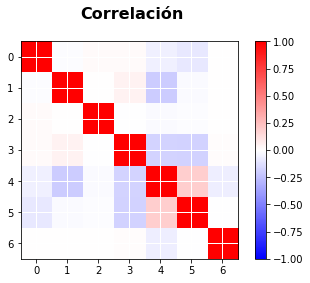

In [0]:
#plotear la variable correlacion 
plt.imshow(correlacion,interpolation="nearest", cmap=plt.cm.bwr, vmin=-1, vmax=1)
plt.suptitle("Correlación",fontsize=16, weight="bold", y=1)
#definir la barra de colores
plt.grid(color='w', linestyle='-', linewidth=1)
plt.colorbar();

**Forma 2: Con seaborn**

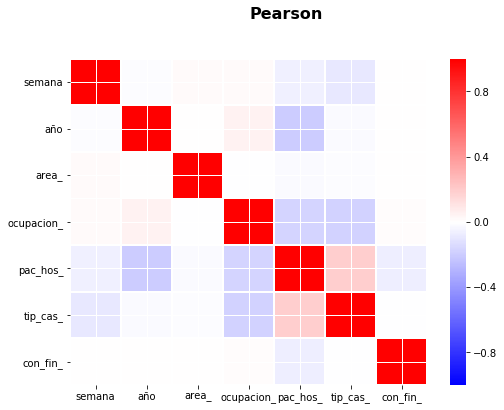

In [0]:
#definir el tamaño de la figura
f,ax = plt.subplots(figsize=(8, 6))
#obtener la correlación con el método pearson
g = sns.heatmap(df_.corr(method="pearson"),linewidths=.8,fmt= '.2f',  ax=ax, cmap=plt.cm.bwr, vmin=-1, vmax=1)
#establecer el título
plt.suptitle("Pearson",fontsize=16, weight="bold", y=1)
#poner la grilla
plt.grid(color='w', linestyle='-', linewidth=1)

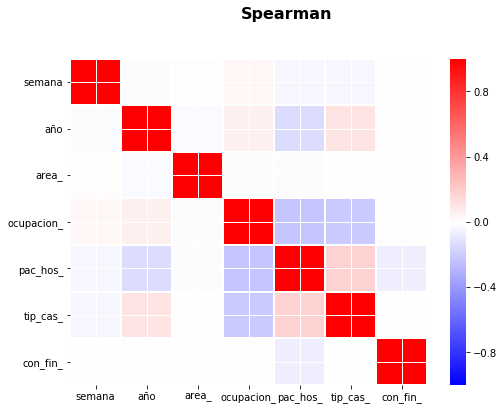

In [0]:
#definir el tamaño de la figura
f,ax = plt.subplots(figsize=(8, 6))
#obtener la correlación con el método spearman
g = sns.heatmap(df_.corr(method="spearman"),linewidths=.8,fmt= '.2f',  ax=ax, cmap=plt.cm.bwr, vmin=-1, vmax=1)
#definir el título
plt.suptitle("Spearman",fontsize=16, weight="bold", y=1)
#poner la grilla
plt.grid(color='w', linestyle='-', linewidth=1)